<a href="https://colab.research.google.com/github/Abhibhardwaj27/Abhi3/blob/main/R%26DTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()

# Check the uploaded file name
import io
import pandas as pd

# Assuming the file is a CSV
file_name = list(uploaded.keys())[0]  # Get the file name
df = pd.read_csv(io.BytesIO(uploaded[file_name]), delimiter=";", decimal=",")
print(df.head())  # Display the first few rows of the data


Saving Solar Power Plant Data.csv to Solar Power Plant Data.csv
  Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
0        01.01.2017-00:00,0.6,0,1003.8,-7.4,0.1,97,0                                                         
1       01.01.2017-01:00,1.7,0,1003.5,-7.4,-0.2,98,0                                                         
2       01.01.2017-02:00,0.6,0,1003.4,-6.7,-1.2,99,0                                                         
3       01.01.2017-03:00,2.4,0,1003.3,-7.2,-1.3,99,0                                                         
4          01.01.2017-04:00,4,0,1003.1,-6.3,3.6,67,0                                                         


In [ ]:
import pandas as pd

df = pd.read_csv("Solar Power Plant Data.csv")  # Make sure the file path is correct
print(df.columns)



Index(['Date-Hour(NMT)', 'WindSpeed', 'Sunshine', 'AirPressure', 'Radiation',
       'AirTemperature', 'RelativeAirHumidity', 'SystemProduction'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("Solar Power Plant Data.csv")
df["Date-Hour(NMT)"] = pd.to_datetime(df["Date-Hour(NMT)"], format="%d.%m.%Y-%H:%M")

features = ["WindSpeed", "Sunshine", "AirPressure", "Radiation", "AirTemperature", "RelativeAirHumidity"]
target = "SystemProduction"

X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")
df.head()


Root Mean Squared Error (RMSE): 875.8520023435098
R² Score: 0.6122642021271074


,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
0,2017-01-01 00:00:00,0.6,0,1003.8,-7.4,0.1,97,0.0
1,2017-01-01 01:00:00,1.7,0,1003.5,-7.4,-0.2,98,0.0
2,2017-01-01 02:00:00,0.6,0,1003.4,-6.7,-1.2,99,0.0
3,2017-01-01 03:00:00,2.4,0,1003.3,-7.2,-1.3,99,0.0
4,2017-01-01 04:00:00,4.0,0,1003.1,-6.3,3.6,67,0.0


In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def categorize_production(value):
    if value == 0:
        return 0  # No Production
    elif value < df["SystemProduction"].quantile(0.66):
        return 1  # Low Production
    else:
        return 2  # High Production

df["ProductionCategory"] = df["SystemProduction"].apply(categorize_production)

features = ["WindSpeed", "Sunshine", "AirPressure", "Radiation", "AirTemperature", "RelativeAirHumidity"]
target = "ProductionCategory"

X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average="weighted")
precision = precision_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Production", "Low Production", "High Production"], yticklabels=["No Production", "Low Production", "High Production"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")


KeyError: 'SystemProduction'

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


df = pd.read_csv("Solar Power Plant Data.csv")
df["Date-Hour(NMT)"] = pd.to_datetime(df["Date-Hour(NMT)"], format="%d.%m.%Y-%H:%M")

def categorize_production(value):
    if value == 0:
        return 0  # No Production
    elif value < df["SystemProduction"].quantile(0.66):
        return 1  # Low Production
    else:
        return 2  # High Production

df["ProductionCategory"] = df["SystemProduction"].apply(categorize_production)

features = ["WindSpeed", "Sunshine", "AirPressure", "Radiation", "AirTemperature", "RelativeAirHumidity"]
target = "ProductionCategory"

X = df[features].values
y = df[target].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


params = {
    "objective": "multi:softmax",  # Multi-class classification
    "num_class": 3,  # 3 classes: No, Low, High production
    "eval_metric": "mlogloss",  # Multi-class log loss
    "eta": 0.1,  # Learning rate
    "max_depth": 6,  # Depth of trees
    "subsample": 0.8,  # Use 80% of data per tree
    "colsample_bytree": 0.8,  # Use 80% of features per tree
    "seed": 42
}

num_rounds = 500
bst = xgb.train(params, dtrain, num_rounds)

y_pred = bst.predict(dtest)


accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average="weighted")
precision = precision_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")


print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Production", "Low Production", "High Production"], yticklabels=["No Production", "Low Production", "High Production"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Accuracy: 0.8933
Recall: 0.8933
Precision: 0.8809
F1-score: 0.8837


NameError: name 'plt' is not defined

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# Load dataset
df = pd.read_csv("Solar Power Plant Data.csv")
df["Date-Hour(NMT)"] = pd.to_datetime(df["Date-Hour(NMT)"], format="%d.%m.%Y-%H:%M")

# Categorize production levels
def categorize_production(value):
    if value == 0:
        return 0  # No Production
    elif value < df["SystemProduction"].quantile(0.66):
        return 1  # Low Production
    else:
        return 2  # High Production

df["ProductionCategory"] = df["SystemProduction"].apply(categorize_production)

# Features and target
features = ["WindSpeed", "Sunshine", "AirPressure", "Radiation", "AirTemperature", "RelativeAirHumidity"]
target = "ProductionCategory"

X = df[features].values
y = df[target].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Convert to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# XGBoost parameters
params = {
    "objective": "multi:softmax",  # Multi-class classification
    "num_class": 3,  # 3 classes: No, Low, High production
    "eval_metric": "mlogloss",  # Multi-class log loss
    "eta": 0.1,  # Learning rate
    "max_depth": 6,  # Depth of trees
    "subsample": 0.8,  # Use 80% of data per tree
    "colsample_bytree": 0.8,  # Use 80% of features per tree
    "seed": 42
}

# Train model
num_rounds = 500
bst = xgb.train(params, dtrain, num_rounds)

# Predictions
y_pred = bst.predict(dtest)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average="weighted")
precision = precision_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Production", "Low Production", "High Production"],
            yticklabels=["No Production", "Low Production", "High Production"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Predicted vs. Actual comparison
comparison_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(comparison_df.head(20))  # Display first 20 rows


Accuracy: 0.8659
Recall: 0.8659
Precision: 0.8662
F1-score: 0.8660


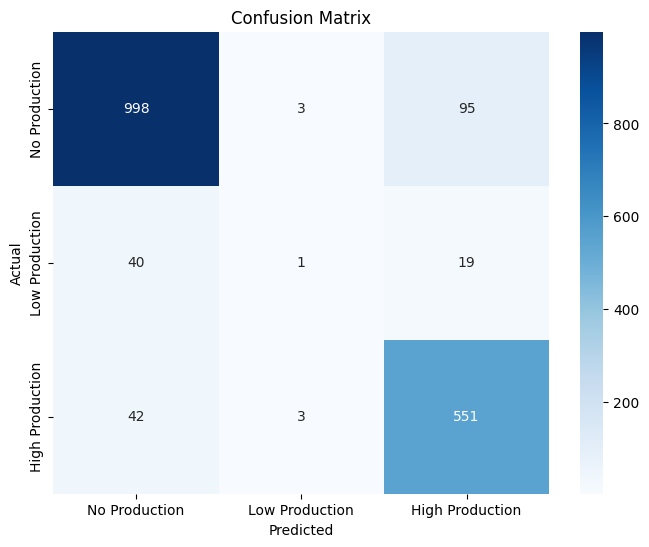

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

df = pd.read_csv("Solar Power Plant Data.csv")

df["Date-Hour(NMT)"] = pd.to_datetime(df["Date-Hour(NMT)"], format="%d.%m.%Y-%H:%M")

df = df[df["SystemProduction"] > 0]


def categorize_production(value):
    if value < df["SystemProduction"].quantile(0.66):
        return 1  # Low Production
    else:
        return 2  # High Production

df["ProductionCategory"] = df["SystemProduction"].apply(categorize_production)

features = ["WindSpeed", "Sunshine", "AirPressure", "Radiation", "AirTemperature", "RelativeAirHumidity"]
target = "ProductionCategory"

X = df[features].values
y = df[target].values


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    "objective": "multi:softmax",
    "num_class": 3,  # Ensure this matches the unique values in y_train
    "eval_metric": "mlogloss",
    "eta": 0.05,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "seed": 42
}


num_rounds = 500
bst = xgb.train(params, dtrain, num_rounds)


y_pred = bst.predict(dtest)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average="weighted")
precision = precision_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")


print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1:.4f}")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Production", "Low Production", "High Production"], yticklabels=["No Production", "Low Production", "High Production"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("Solar Power Plant Data.csv")

# Convert 'Date-Hour(NMT)' to datetime
df["Date-Hour(NMT)"] = pd.to_datetime(df["Date-Hour(NMT)"], format="%d.%m.%Y-%H:%M")

# Define categories for SystemProduction
def categorize_production(value):
    if value == 0:
        return 0  # No Production
    elif value < df["SystemProduction"].quantile(0.66):
        return 1  # Low Production
    else:
        return 2  # High Production

df["ProductionCategory"] = df["SystemProduction"].apply(categorize_production)

# Select features and target
features = ["WindSpeed", "Sunshine", "AirPressure", "Radiation", "AirTemperature", "RelativeAirHumidity"]
target = "ProductionCategory"

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print(feature_importance)


FileNotFoundError: [Errno 2] No such file or directory: 'Solar Power Plant Data.csv'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Features and Target Variable
features = ["WindSpeed", "Sunshine", "AirPressure", "Radiation", "AirTemperature", "RelativeAirHumidity"]
target = "SystemProduction"

X = df[features]
y = df[target]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict energy production for 10 entries from the test set
y_pred = model.predict(X_test[:10])

# Display actual vs predicted values
result_df = pd.DataFrame({"Actual Production (kWh)": y_test[:10].values, "Predicted Production (kWh)": y_pred})
print(result_df)

# Model Evaluation
mae = mean_absolute_error(y_test, model.predict(X_test))
mse = mean_squared_error(y_test, model.predict(X_test))
r2 = r2_score(y_test, model.predict(X_test))

print(f"\nModel Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


KeyError: "None of [Index(['WindSpeed', 'Sunshine', 'AirPressure', 'Radiation', 'AirTemperature',\n       'RelativeAirHumidity'],\n      dtype='object')] are in the [columns]"